In [ ]:
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install FATS

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
from google.colab import files
files.upload()

Saving SNe_more_5.csv to SNe_more_5.csv


{'SNe_more_5.csv': b'objectId,classALeRCE,mjd,fid,ra,dec,magpsf_corr,sigmapsf_corr\nZTF18abshezu,SLSN,58432.242986099795,1.0,359.3247742,-15.631484,17.82229032780802,0.04954682240063826\nZTF18abshezu,SLSN,58382.25263890019,1.0,359.3247373,-15.6314659,18.340104859049116,0.08233014440179094\nZTF18abshezu,SLSN,58390.31440970022,1.0,359.3247507,-15.6315086,18.19809355606488,0.06610627523136114\nZTF18abshezu,SLSN,58469.14880790003,1.0,359.3248088,-15.6315432,18.490851928207142,0.0870279161948559\nZTF18abshezu,SLSN,58423.240335599985,1.0,359.3247748,-15.6314656,17.80619428249255,0.040923357889156874\nZTF18abshezu,SLSN,58378.33565969998,1.0,359.3247807,-15.6314542,18.532546146385606,0.08701510412455121\nZTF18abshezu,SLSN,58372.4009953998,1.0,359.3247845,-15.6314943,18.82853754336619,0.09362445395662729\nZTF18abshezu,SLSN,58363.3348495001,1.0,359.3247668,-15.6315244,19.78622446624032,0.18106966504960262\nZTF18abshezu,SLSN,58438.21125000017,1.0,359.324839,-15.6314452,17.844965450479002,0.185471

Crear dataset

In [ ]:
data = pd.read_csv('SNe_more_5.csv')
data

,objectId,classALeRCE,mjd,fid,ra,dec,magpsf_corr,sigmapsf_corr
0,ZTF18abshezu,SLSN,58432.242986,1.0,359.324774,-15.631484,17.822290,0.049547
1,ZTF18abshezu,SLSN,58382.252639,1.0,359.324737,-15.631466,18.340105,0.082330
2,ZTF18abshezu,SLSN,58390.314410,1.0,359.324751,-15.631509,18.198094,0.066106
3,ZTF18abshezu,SLSN,58469.148808,1.0,359.324809,-15.631543,18.490852,0.087028
4,ZTF18abshezu,SLSN,58423.240336,1.0,359.324775,-15.631466,17.806194,0.040923
...,...,...,...,...,...,...,...,...
33899,ZTF19abgnbjr,SNIbc,58695.482616,2.0,56.645178,25.115208,17.393979,100.000000
33900,ZTF19abgnbjr,SNIbc,58692.491921,2.0,56.645167,25.115181,17.395109,100.000000
33901,ZTF19abgnbjr,SNIbc,58704.486146,2.0,56.645161,25.115217,17.499520,100.000000
33902,ZTF19abgnbjr,SNIbc,58707.495868,2.0,56.645144,25.115176,17.489904,100.000000


Eliminar datos con mucho error

In [ ]:
data.drop('ra', inplace=True, axis=1)
data.drop('dec', inplace=True, axis=1)
data2 = data[data['sigmapsf_corr']<1]
data2

,objectId,classALeRCE,mjd,fid,magpsf_corr,sigmapsf_corr
0,ZTF18abshezu,SLSN,58432.242986,1.0,17.822290,0.049547
1,ZTF18abshezu,SLSN,58382.252639,1.0,18.340105,0.082330
2,ZTF18abshezu,SLSN,58390.314410,1.0,18.198094,0.066106
3,ZTF18abshezu,SLSN,58469.148808,1.0,18.490852,0.087028
4,ZTF18abshezu,SLSN,58423.240336,1.0,17.806194,0.040923
...,...,...,...,...,...,...
33888,ZTF20aaurexl,SNIbc,58986.455810,2.0,19.394915,0.112153
33889,ZTF19aanmzsb,SNIbc,58567.515706,1.0,18.599399,0.068463
33890,ZTF19aanmzsb,SNIbc,58567.481725,1.0,18.592801,0.051923
33891,ZTF19aanmzsb,SNIbc,58572.395498,1.0,18.672631,0.055491


Eliminar duplicados

In [ ]:
data3=data2.drop_duplicates()
data3

,objectId,classALeRCE,mjd,fid,magpsf_corr,sigmapsf_corr
0,ZTF18abshezu,SLSN,58432.242986,1.0,17.822290,0.049547
1,ZTF18abshezu,SLSN,58382.252639,1.0,18.340105,0.082330
2,ZTF18abshezu,SLSN,58390.314410,1.0,18.198094,0.066106
3,ZTF18abshezu,SLSN,58469.148808,1.0,18.490852,0.087028
4,ZTF18abshezu,SLSN,58423.240336,1.0,17.806194,0.040923
...,...,...,...,...,...,...
33837,ZTF20aaurexl,SNIbc,58986.455810,2.0,19.394915,0.112153
33889,ZTF19aanmzsb,SNIbc,58567.515706,1.0,18.599399,0.068463
33890,ZTF19aanmzsb,SNIbc,58567.481725,1.0,18.592801,0.051923
33891,ZTF19aanmzsb,SNIbc,58572.395498,1.0,18.672631,0.055491


Eliminar infinitos por nan, eliminar nans y sacar todas las supernovas con menos de 5 onservaciones

In [ ]:
data3.replace([np.inf, -np.inf], np.nan)
data3.dropna()
data3=data3.groupby("objectId").filter(lambda x: len(x) > 4)
data3

,objectId,classALeRCE,mjd,fid,magpsf_corr,sigmapsf_corr
0,ZTF18abshezu,SLSN,58432.242986,1.0,17.822290,0.049547
1,ZTF18abshezu,SLSN,58382.252639,1.0,18.340105,0.082330
2,ZTF18abshezu,SLSN,58390.314410,1.0,18.198094,0.066106
3,ZTF18abshezu,SLSN,58469.148808,1.0,18.490852,0.087028
4,ZTF18abshezu,SLSN,58423.240336,1.0,17.806194,0.040923
...,...,...,...,...,...,...
33833,ZTF20aaurexl,SNIbc,58953.451424,2.0,18.627782,0.087630
33834,ZTF20aaurexl,SNIbc,59004.297801,2.0,19.703096,0.178204
33835,ZTF20aaurexl,SNIbc,58999.346852,2.0,19.737400,0.109826
33836,ZTF20aaurexl,SNIbc,59015.330567,2.0,20.251977,0.171113


In [ ]:
Id = data3['objectId']
Frec_Id = Id.value_counts()
N_objetos=len(Frec_Id)
lista_Ids=Id.unique()
print(lista_Ids)

['ZTF18abshezu' 'ZTF19aanesgt' 'ZTF18acyxnyw' 'ZTF19aamhhiz'
 'ZTF19abpbopt' 'ZTF19aamrais' 'ZTF18aavjcpf' 'ZTF18acnnevs'
 'ZTF18aajkivu' 'ZTF20aacbwbm' 'ZTF19aauishy' 'ZTF19aauxxgk'
 'ZTF19aapbfot' 'ZTF19aarjfqe' 'ZTF19aavhblr' 'ZTF19aamvape'
 'ZTF19aanpcep' 'ZTF19aakssnv' 'ZTF19aalsnbp' 'ZTF18adbclkd'
 'ZTF18adacicy' 'ZTF18abvejqt' 'ZTF18acszayr' 'ZTF18acrflch'
 'ZTF18acrwheu' 'ZTF18acefuhk' 'ZTF18abzscns' 'ZTF18abvfecb'
 'ZTF18acgvgiq' 'ZTF18abmdpwe' 'ZTF18abimhfu' 'ZTF18abeajml'
 'ZTF18abcptmt' 'ZTF19aawlkjx' 'ZTF19aavrcew' 'ZTF19aaydpzi'
 'ZTF19aaydpiq' 'ZTF19aazpvdy' 'ZTF19aazudta' 'ZTF19abacxod'
 'ZTF19abajxet' 'ZTF19abgiwkt' 'ZTF19abfwdqv' 'ZTF19abdkgwo'
 'ZTF19abiietd' 'ZTF19abjioie' 'ZTF19ablfdwt' 'ZTF19abpnrrf'
 'ZTF19abqyoxt' 'ZTF19abqrxhy' 'ZTF19abjpntj' 'ZTF19abudjie'
 'ZTF19abctxhf' 'ZTF19abgmkef' 'ZTF19abqgtqo' 'ZTF19abgurml'
 'ZTF19acblhxc' 'ZTF19acbrzzr' 'ZTF19acbwouf' 'ZTF18abtteyy'
 'ZTF19acjwdnu' 'ZTF19acvmcdd' 'ZTF19aczlldp' 'ZTF20aabqiav'
 'ZTF20aafckit' 'ZTF20aa

In [ ]:
d = {}
for id in lista_Ids:
   d[id] = data3[data3['objectId']==id]
len(d)

553

In [ ]:
filtro1=data3[data3['fid']==1.0]
filtro2=data3[data3['fid']==2.0]
filtro2

,objectId,classALeRCE,mjd,fid,magpsf_corr,sigmapsf_corr
16,ZTF18abshezu,SLSN,58432.252222,2.0,17.929034,0.062880
17,ZTF18abshezu,SLSN,58369.377477,2.0,19.047771,0.089480
18,ZTF18abshezu,SLSN,58387.435498,2.0,18.594845,0.149956
19,ZTF18abshezu,SLSN,58426.252778,2.0,17.985864,0.057889
20,ZTF18abshezu,SLSN,58457.169236,2.0,18.174656,0.104699
...,...,...,...,...,...,...
33833,ZTF20aaurexl,SNIbc,58953.451424,2.0,18.627782,0.087630
33834,ZTF20aaurexl,SNIbc,59004.297801,2.0,19.703096,0.178204
33835,ZTF20aaurexl,SNIbc,58999.346852,2.0,19.737400,0.109826
33836,ZTF20aaurexl,SNIbc,59015.330567,2.0,20.251977,0.171113


In [ ]:
d_filtro1 = {}
for id in lista_Ids:
   d_filtro1[id] = filtro1[filtro1['objectId']==id]

d_filtro2 = {}
for id in lista_Ids:
   d_filtro2[id] = filtro2[filtro2['objectId']==id]   

#d[lista_Ids[3]][['mjd','magpsf_corr']])
#d_filtro1

usamos el filtro 1 para referencia

In [ ]:
d_tmax={}
for id in lista_Ids:
  if not d_filtro1[id].empty:
    indice=(d_filtro1[id]['magpsf_corr']).idxmax()
    tiempo_max=d_filtro1[id]['mjd'][indice]
    d_tmax[id]=tiempo_max

for id in lista_Ids:
  if id in d_tmax:
    if id in d_filtro1:
      d_filtro1[id]["mjd"] -= d_tmax[id]
    if id in d_filtro2:
      d_filtro2[id]["mjd"] -= d_tmax[id]
  else:
    del d_filtro1[id]
    del d_filtro2[id]

(len(d_filtro1),len(d_filtro2))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


(473, 473)

In [ ]:
d_arrays_f1={}
d_arrays_f2={}

for id in lista_Ids:
  if id in d_filtro1:
      d_arrays_f1[id]=[ d_filtro1[id]['mjd'].to_numpy(), d_filtro1[id]['magpsf_corr'].to_numpy() , d_filtro1[id]['sigmapsf_corr'].to_numpy() ]
      d_arrays_f2[id]=[ d_filtro2[id]['mjd'].to_numpy(), d_filtro2[id]['magpsf_corr'].to_numpy() , d_filtro2[id]['sigmapsf_corr'].to_numpy() ]

#d_arrays
d_arrays_f1

In [ ]:
# Import the data
[ mag , time , error ] = d_arrays_f1['ZTF19abqyoxt']
[ mag2 , time2 , error2 ] = d_arrays_f2['ZTF19abqyoxt']

# Preprocess the data
preprocessed_data = FATS.Preprocess_LC( mag ,time , error )
[ mag , time , error ] = preprocessed_data.Preprocess()
preprocessed_data = FATS.Preprocess_LC( mag2, time2 , error2 )
[ mag2 , time2 , error2 ] = preprocessed_data.Preprocess()

# Synchronize the data
if len ( mag ) != len ( mag2 ) :
  [ aligned_mag , aligned_mag2 ,aligned_time , aligned_error , aligned_error2 ] = FATS.Align_LC(time,time2,mag,mag2,error,error2)
lc = np.array ([ mag , time , error , mag2 ,aligned_mag , aligned_mag2 , aligned_time, aligned_error , aligned_error2 ])


NameError: ignored

In [ ]:
d_arrays_f1['ZTF19abqyoxt']

[array([-17.9030093, -78.9849537, -87.9466551, -60.9846991,   0.       ]),
 array([19.10719626, 18.45441475, 18.33152785, 18.77406456, 19.2266381 ]),
 array([0.06034257, 0.05579109, 0.04965624, 0.0741822 , 0.07986148])]

Text(0, 0.5, 'magnitud')

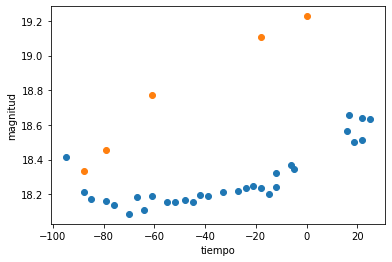

In [ ]:
ID='ZTF19abqyoxt'    
t1=d_arrays_f1[ID][0]
mag1=d_arrays_f1[ID][1]
t2=d_arrays_f2[ID][0]
mag2=d_arrays_f2[ID][1]
plt.scatter(t2,mag2)
plt.scatter(t1,mag1)
plt.xlabel('tiempo')
plt.ylabel('magnitud')

In [ ]:
dcount=dcount.drop_duplicates(subset ="objectId") 
tipos_SN=dcount['classALeRCE']
tipos_SN.value_counts()

SNIa     584
SNII     129
SNIbc     42
SNIIn     19
SLSN      14
SNIIb      8
Name: classALeRCE, dtype: int64